In [2]:
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline
from matplotlib import animation
from IPython.display import HTML

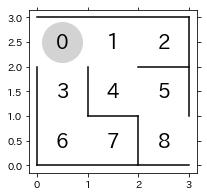

In [3]:
fig = plt.figure(figsize=(3,3))

plt.plot([0, 3], [3, 3], color='k')
plt.plot([0, 3], [0, 0], color='k')
plt.plot([0, 0], [0, 2], color='k')
plt.plot([3, 3], [1, 3], color='k')
plt.plot([1, 1], [1, 2], color='k')
plt.plot([2, 3], [2, 2], color='k')
plt.plot([2, 1], [1, 1], color='k')
plt.plot([2, 2], [0, 1], color='k')

for i in range(3):
    for j in range(3):
        plt.text(0.5+i, 2.5-j, str(i+j*3), size=20, ha='center', va='center')

circle, = plt.plot([0.5], [2.5], marker='o', color='#d3d3d3', markersize=40)

plt.tick_params(axis='both', which='both', bottom='off', top='off', 
        labelbottom='off', right='off', left='off', labelleft='off')
plt.box('off')


In [4]:
theta_0 = np.array([
    [np.nan, 1, 1, np.nan],
    [np.nan, 1, 1, 1],
    [np.nan, np.nan, np.nan, 1],
    [1, np.nan, 1, np.nan],
    [1, 1, np.nan, np.nan],
    [np.nan, np.nan, 1, 1],
    [1, 1, np.nan, np.nan],
    [np.nan, np.nan, np.nan, 1]])

In [5]:
def get_pi(theta):
    [m, n] = theta.shape
    pi = np.zeros((m, n))
    exp_theta = np.exp(theta)
    for i in range(0, m):
        pi[i, :] = exp_theta[i, :] / np.nansum(exp_theta[i, :])
    pi = np.nan_to_num(pi)
    return pi

In [6]:
def get_a(pi, s):
    return np.random.choice([0, 1, 2, 3], p=pi[s])

def get_s_next(s, a):
    if a == 0:
        return s - 3
    elif a == 1:
        return s + 1
    elif a == 2:
        return s + 3
    elif a == 3:
        return s - 1

In [ ]:
def play(pi):
    s = 0
    s_a_history = [[0, np.nan]]
    
    while True:
        a = get_a(pi, s)
        
        s_next = get_s_next(s, a)
        
        s_a_history[-1][1] = a
        s_a_history.append([s_next, np.nan])
        
        if s_next == 8:
            break
        else:
            s = s_next
    
    return s_a_history

In [ ]:
s_a_history = play(pi_0)
print(s_a_history)

In [ ]:
def update_theta(theta, pi, s_a_history):
    eta = 0.1
    total = len(s_a_history) -1
    [s_count, a_count] = theta.shape

    delta_theta = theta.copy()
    for i in range(0, s_count):
        for j in range(0, a_count):
            if not(np.isnan(theta[i, j])):
                sa_ij = [sa for sa in s_a_history if sa == [i, j]]
                n_ij = len(sa_ij)

                sa_i = [sa for sa in s_a_history if sa[0] == i]
                n_i = len(sa_i)

                delta_theta[i, j]=(n_ij - pi[i, j] * n_i) / total

    return theta + eta * delta_theta

In [ ]:
stop_epsilon = 10**-4
theta = theta_0
pi = pi_0

for episode in range(10000):
    sa_a_history = play(pi)

    theta = update_theta(theta, pi, s_a_history)

    pi_new = get_pi(theta)

    pi_delta = np.sum(np.abs(pi_new-pi))
    pi = pi_new

    print('エピソード: {}, ステップ: {}, 方策変化量: {:.4f}'.format(
        episode, len(s_a_history)-1, pi_delta
    ))

    if pi_delta < stop_epsilon:
        break

In [ ]:
def animate(i):
    state = s_a_history[i][0]
    circle.set_data((state % 3) + 0.5, 2.5 - int(state / 3))
    return circle

anim = animation.FuncAnimation(fig, animate, \
    frames=len(s_a_history), interval=200, repeat=False)
HTML(anim.to_jshtml())